#  MTH 9899 Machine Learning Assignment 3


#### Problem
In class, we went through the details of manually calculating backprop on a simple network. For this question, we’re going to do backpropagation using numpy, and no 3rd party packages. The goal is to train a simple network with 2 input features and 3 hidden layers. Both the hidden layers and the output layer should use a sigmoid activation function. For loss, please use mean squared error (MSE). Below is a picture of the network and a listing of code to generate sample and test data. Please train your network on 50,000 input rows in a single training batch. Graph the loss function vs the iteration. Repeat this graph using different values of η, the learning rate. How
does this affect the loss?

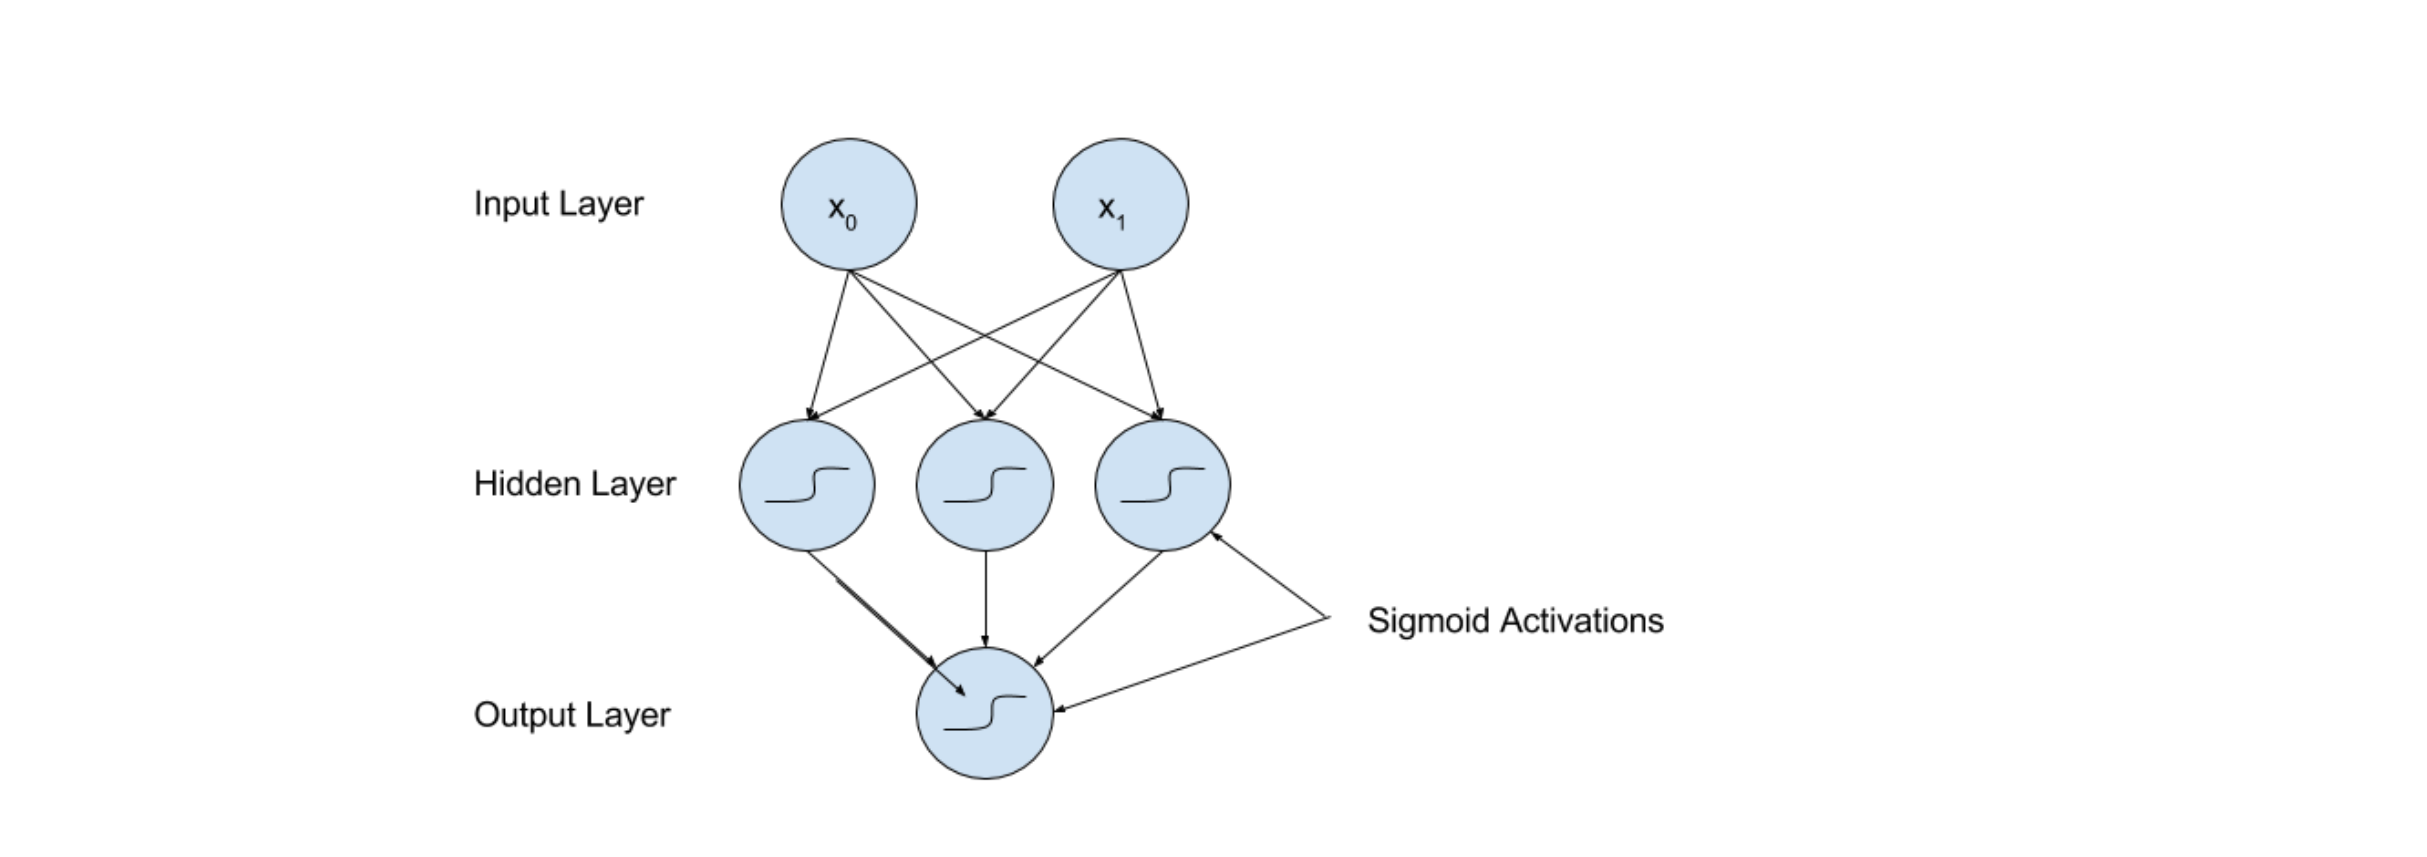

##### <font color='blue'>Solution</font>


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def get_test_data(num_pts, F):
    '''
    params: num_pts is the sample size
            F is the num of features
    return: X and Y       
    '''
    centers = [(0,0,1), (1,1,-1), (1,-1,1), (-2,0,-1), (4,1,1)]
    X = np.random.rand(num_pts,F)*10 - 5
    
    def get_y(x):
        distances =[np.sqrt(np.sum((x-c[:2])**2)) for c in centers]
        which = np.argmin(distances)
        return centers[which][2] * distances[which]
    
    Y = np.array([get_y(x) for x in X])
    return X,Y


In [3]:
class neural_netwrok:
    '''
    3-layer neural network
    Note: output is only one dimension
    '''
    def __init__(self, input_size, hidden_size, X, Y, activation, dactivation):
        self.theta1 = np.ones((hidden_size, input_size+1))
        self.theta2 = np.ones((1,hidden_size+1))
        self.N = X.shape[0]
        self.X = X
        self.Y = Y.reshape(self.N,1)
        self.activation = activation
        self.dactivation = dactivation
  
    def get_loss(self):
        '''
        params: X, Y is the input data. 
                X is N by F dimension; Y is N by 1 dimension   
        return: cost function 0.5*||y-y_hat||_2
        '''
        a1 = np.concatenate((np.ones((self.N,1)), self.X), axis=1)
        z2 = np.dot(a1, self.theta1.T)
        a2 = self.activation(z2)
        a2 = np.concatenate((np.ones((self.N,1)), a2), axis=1)
        z3 = np.dot(a2, self.theta2.T)
        a3 = self.activation(z3)  
        return (0.5 * np.linalg.norm(self.Y-a3)**2)/self.N
    
    def update_params(self, eta):
        '''
        params: eta is the learning rate
        '''
        theta1_grad = np.zeros((self.theta1.shape))
        theta2_grad = np.zeros((self.theta2.shape))
        
        for t in range(self.N):
            # forward prop the value
            a1 = np.hstack((1,self.X[t])).reshape((self.theta1.shape[1], 1))
            z2 = np.dot(self.theta1, a1)
            a2 = np.vstack((1,self.activation(z2)))
            z3 = np.dot(self.theta2, a2)
            a3 = self.activation(z3)
            
            # backprop the derivative,
            delta3 = self.dactivation(z3)*(a3 - self.Y[t])
            delta2 = np.dot(self.theta2.T, delta3) * np.vstack((1, self.dactivation(z2)))
            delta2 = delta2[1:,]
            
            theta1_grad += np.dot(delta2, a1.T) 
            theta2_grad += np.dot(delta3, a2.T)
        
        self.theta1 -= eta/self.N*theta1_grad
        self.theta2 -= eta/self.N*theta2_grad      
        
    def reset_params(self):  
        '''
        reset the params, used in the visual_update function
        '''
        self.theta1 = np.ones(self.theta1.shape)
        self.theta2 = np.ones(self.theta2.shape)
    
    def visualize_update(self, n, etas):
        '''
        params: n is the num of iterations
                etas are the learning rates set
        return: Graph the loss function vs the iteration with different learning rate
        '''        
        loss = []
        for eta in etas:
            self.reset_params()
            loss_tmp = []
            loss_tmp.append(self.get_loss())
            for i in range(n):
                self.update_params(eta)
                loss_tmp.append(self.get_loss())
            loss.append(loss_tmp)
        
        # plot
        plt.figure()
        plt.subplot(111)
                
        for i in range(len(etas)):
            plt.plot(range((n+1)),loss[i],label='eta: '+ str(etas[i]))
            
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('loss vs iteration')
        plt.legend()
        plt.show()

In [4]:
# set activation function
sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid = lambda x: sigmoid(x) * (1-sigmoid(x))

# set learning rate set
etas = [0.5, 1.5, 50.4]
iterations = 200

# set params
input_size = 2
hidden_size = 3

# generate test data
X, Y = get_test_data(1000, input_size)

# generate neural network
nn = neural_netwrok(input_size, hidden_size, X, Y, sigmoid, dsigmoid)

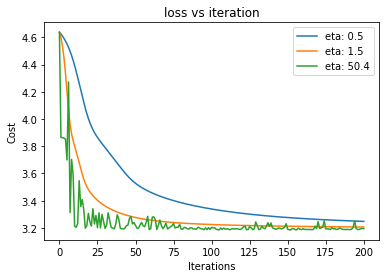

The proess takes 51.3862988948822 seconds to finish


In [5]:
# visualize the graph
start = time.time()
nn.visualize_update(iterations, etas)
elapsed = time.time() - start
print ("The proess takes {0} seconds to finish".format(elapsed))

##### Comment

From above graph, we can see different learning rate has different effect on the performance of convergence. 

Loosely speaking, 
- when the learning rate is small, the object function takes a long time to reach the minimum; 
- When the learning rate is sufficiently large, the object function converges quickly;
- When the learning rate is quite large, the object function may not converge at all and may fluctuate as iteration increases.

##### Note

To make clear, some definitions are listed below.

- X, Y
$$
X = \left[
    \begin{matrix}
     --X_1-- \\ --X_2-- \\ ... \\ --X_n-- 
    \end{matrix}
    \right]
$$

$$
Y = \left[
    \begin{matrix}
     Y_1 \\ Y_2 \\ ... \\ Y_n 
    \end{matrix}
    \right]
$$


- cost function
$$Cost = \frac{1}{2 \, N} \, \sum^{N}_{i=1} (h(x^{(i)})-y^{i})^2$$